In [1]:
%matplotlib notebook
import matplotlib.pyplot as plt
import lightkurve as lk

# False Positives - background flux

This notebook ia the first in the series of false positives and will cover how we can look at the background flux to ensure that the signal seen in the lightcurve is not caused by something else passing through the field of view. 

Notes:

- You need to run each cell. Do this by either pressing the 'run' button at the top of the page or pressing shift+enter (this is what Nora does in the videos). 

- When you run a cell, a star will appear in the brackets to the left of the cell while the cell is runnning. Once it has successfully completed running the code the star will turn into a number (often it runs so fast that you don't see the star).

- Text following a #, or within triple quotation marks (''') is ignored by the code (except in this cell because I made this into a text cell)


<IPython.core.display.Javascript object>


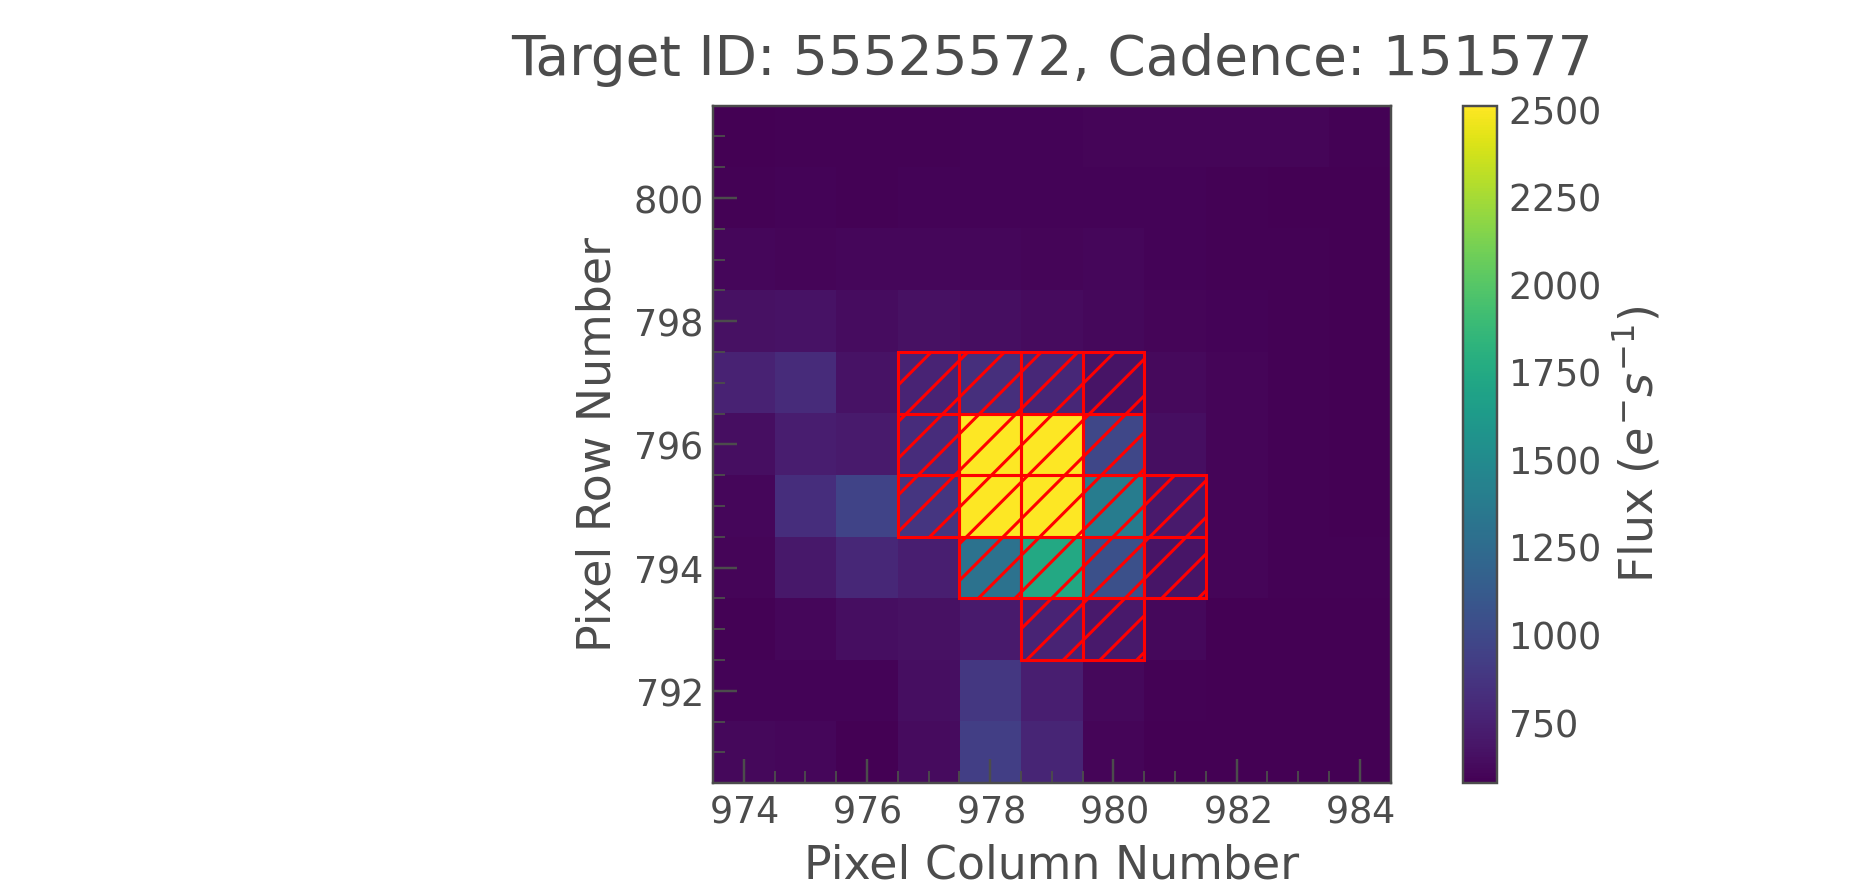

In [2]:
TIC = 'TIC 55525572' # !! CHANGE THIS to run code for a different TIC ID

# for this analysis we only want one sector of data, so user the 'sector = ' command in the line below.

# this is new!! previously we used the 'search_lightcurve' - but for this plot we need to use 'search_targetpixelfile'
search_result = lk.search_targetpixelfile(TIC, author="SPOC", sector=5)

# download the data
tpf = search_result.download()

# plot the data (the aperture_mask='pipeline' command tells it to plot the red hatched aperture)
tpf.plot(aperture_mask='pipeline')

<IPython.core.display.Javascript object>


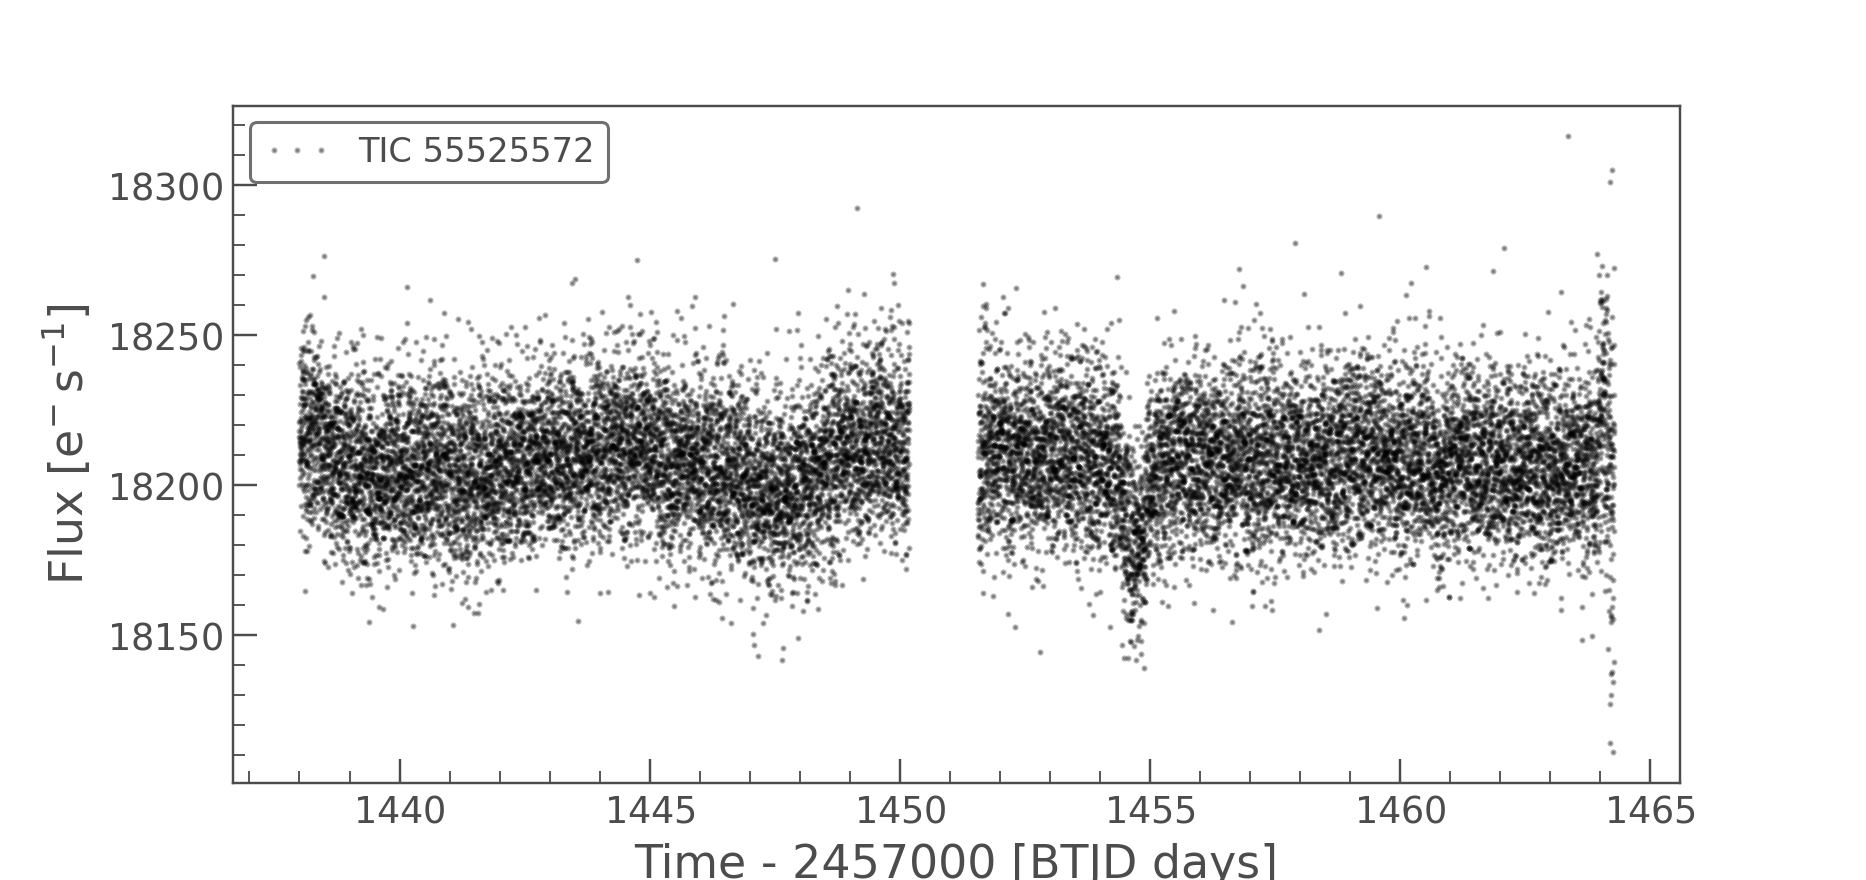

In [5]:
# now let's download the TESS lightcurve for the same sector - this is the same code we've seen before

TIC = 'TIC 55525572'

# search for the same sector that you plotted in the cell above for the target pixel file
sector_data = lk.search_lightcurve(TIC, author = 'SPOC', sector = 5)
lc = sector_data.download()

# plot the data as black points
lc.plot(linewidth = 0, marker = '.', color = 'black', alpha = 0.3)

Now that we've seen the lightcurve, let's try plotting the background flux. 

Previously when we plotted things, we used the 'lc.plot', however that only plots the lightcurve and not the background flux. 

If we have downloaded the data using lightkurve and stored it in a paramater called 'lc' (as we did in the above cell), we can access various data like this: 

- **lc.time.value** - for the list of times of the observations 
- **lc.sap_flux.value** - for the list of fluxes
- **lc.sap_bkg.value** - for the list of background fluxes
    
    
'sap' stands for Simple Apeture Photometry and the '.value' turns it into a format that we can use to plot it.


<IPython.core.display.Javascript object>


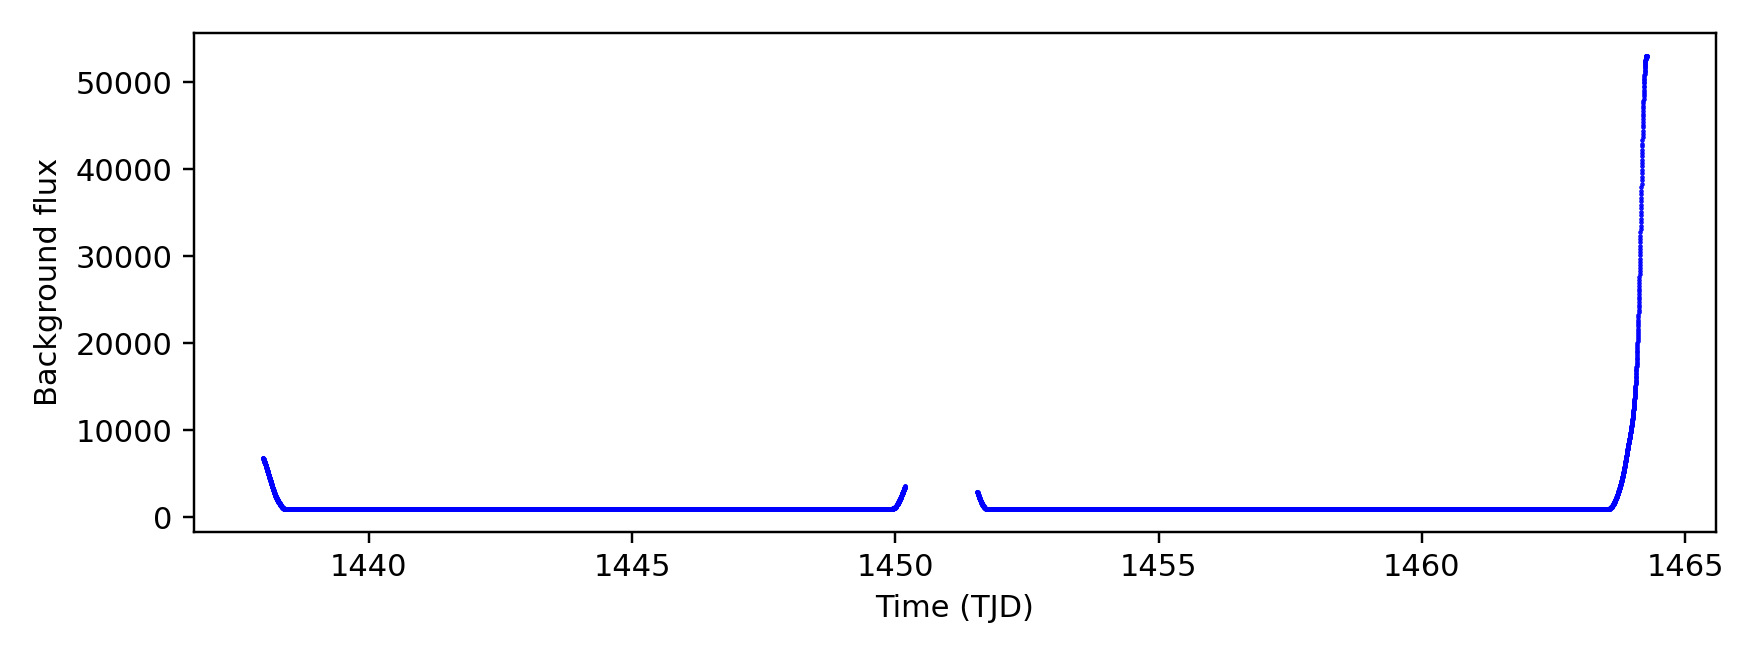

In [4]:
# now that we've seen the lightcurve, let's try plotting the backrgound flux

# set up the plotting region
fig, ax = plt.subplots(figsize = (8,3))

# plot the time vs the backrgound flux (see above cell)
plt.plot(lc.time.value, lc.sap_bkg.value, color = 'blue', lw = 0, marker = '.', ms = 1)

plt.ylabel("Background flux") # label the axes
plt.xlabel("Time (TJD)")
plt.tight_layout()
plt.show()

Above you can see a long term varying trend in the backrgound flux (which isn't a concern). What we're really interested in checking is that the background flux is **SMOOTH** directly around the time of the transit like event.

To check the backrgound flux around the time of the transit event we first need to define the time of the transit event - look at the full ligthcurve (example from a few cells up) to see when the dip occurs. 

We can then generate a 'mask' that crops the data to only include the time around the transit event!

In the example below the mask is defined as:
*transit_mask = lc.time.value > transit_time - 2) & (lc.time.value < transit_time + 2)*

This means that we only want time values that are greater than 2 days before the transit time and smaller than 2 days after the transit time. You can change the 2 days to be any number of days you like to change the size of the cut out. 

Once we have the mask defined, we can apply it to data sets (if they have the same shape!) using square brackets. for example: *lc.time.value[transit_mask]*

<IPython.core.display.Javascript object>


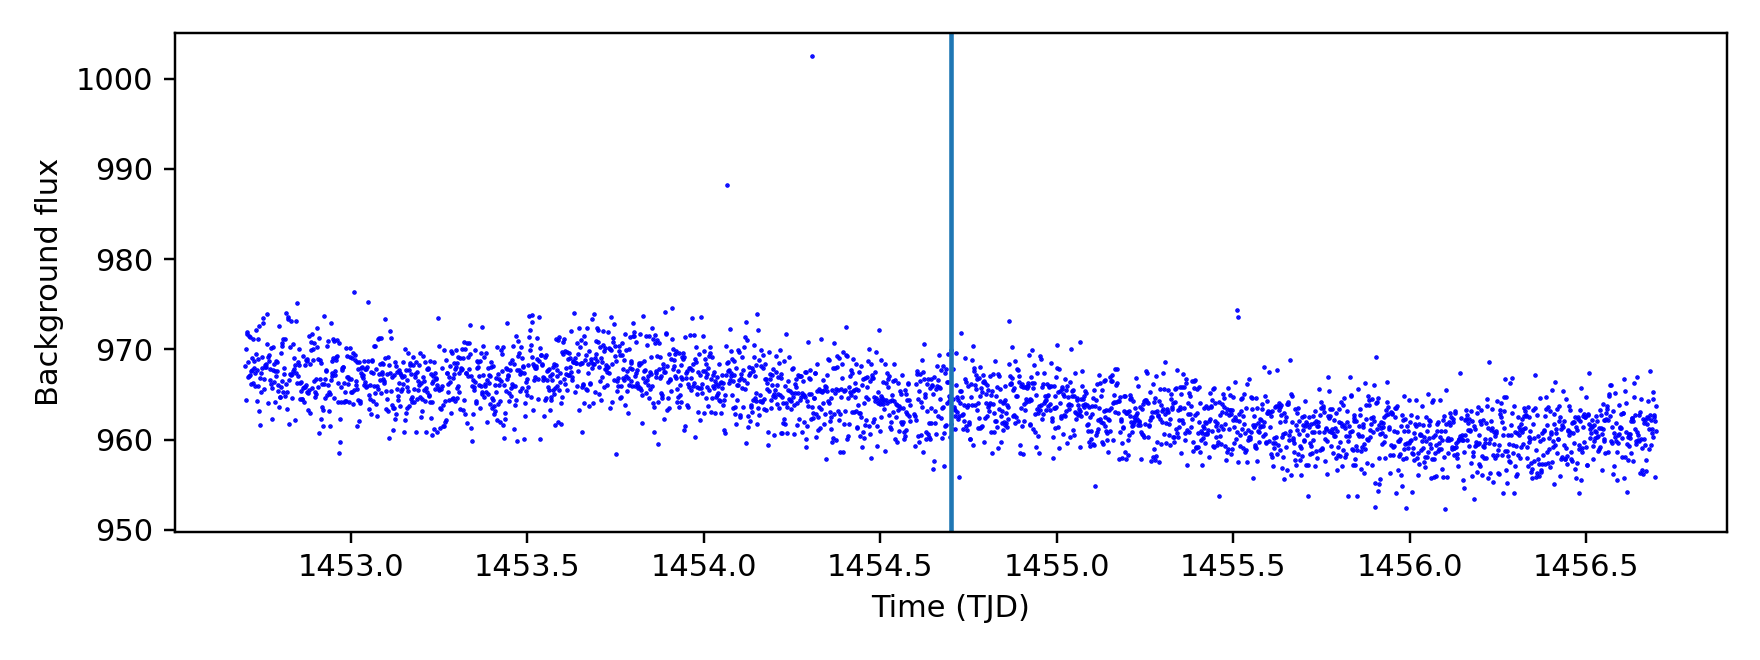

In [17]:
transit_time = 1454.7 # CHANGE THIS for different targets !!! time of transit event 

# generate a mask so that we only see the times around the transit event
# in this example we are looking at 2 days on either side of the event but you can CHANGE THIS depending on the signal.
transit_mask = (lc.time.value > transit_time - 2) & (lc.time.value < transit_time + 2)

# generate the figure
fig, ax = plt.subplots(figsize = (8,3))

# mask the date (both the time and the flux using the mask we just generated)
plt.plot(lc.time.value[transit_mask], lc.sap_bkg.value[transit_mask], color = 'blue', lw = 0, marker = '.', ms = 1)

plt.axvline(transit_time) # plot a vertical line at the time of the transi event!

plt.ylabel("Background flux") # label the axes
plt.xlabel("Time (TJD)")
plt.tight_layout()
plt.show()

As you can see in the example above, the backrgound flux around the time of the transit-like event (indicated by the blue line) is smooth (there are no sudden spikes). This means that there is nothing strange going on with the background and this is therefore NOT a false postive (aka it's a potential real signal YAY!).

Now, let's make this diagnostic even better by plotting the ligthtcurve and the backrgound flux at the same time - both cut out around the time of the transit like event. We will use the same 'mask' feature that we used above to do that. 

To plot both together we need to define a plotting region that contains two subplots (2 rows and 1 column in our case). The 'ax' now contains two axes, which we can access using ax[0] for the first one and ax[1] for the second. To plot sometime on the first axis, for example, we would therefore use: *ax[0].plot(lc.time.value, lc.flux.value)*. 

<IPython.core.display.Javascript object>


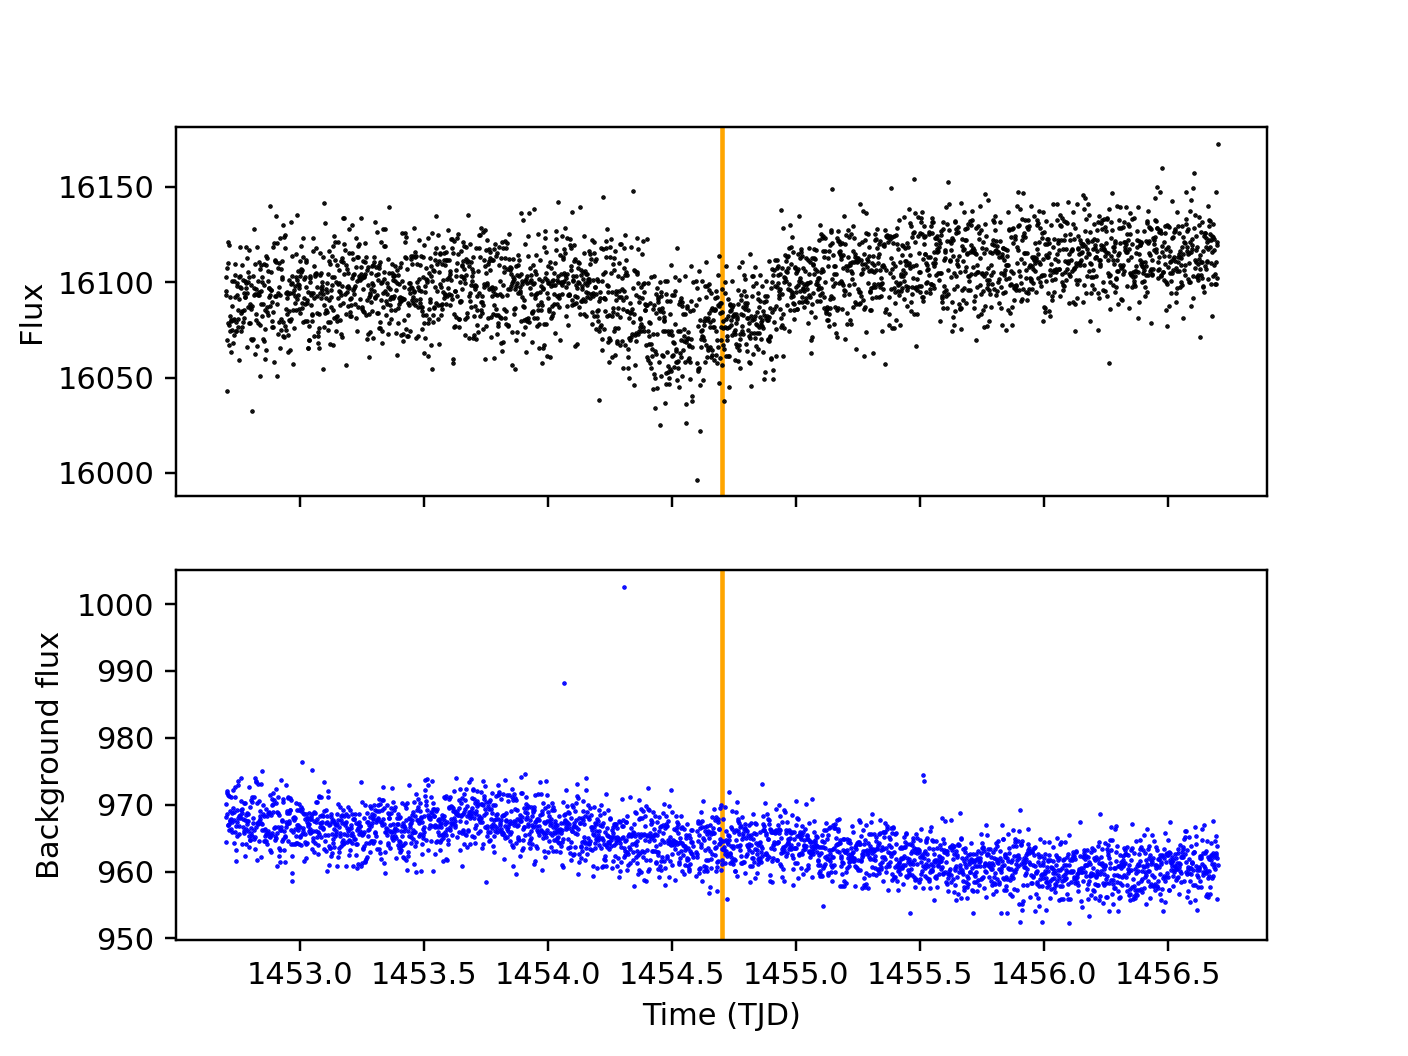

In [18]:
# define a plotting region with two parts
fig, ax = plt.subplots(2,1, sharex = True)

#plot the flux on the first axes and the background flux on the second
#crop both data sets using the mask that we defined in the cell above
ax[0].plot(lc.time.value[transit_mask], lc.sap_flux.value[transit_mask], color = 'k', lw = 0, marker = '.', ms = 1)
ax[1].plot(lc.time.value[transit_mask], lc.sap_bkg.value[transit_mask], color = 'blue', lw = 0, marker = '.', ms = 1)

#plot a line at the time of the transit event on both plots
ax[0].axvline(transit_time, color = 'orange', zorder = -1)
ax[1].axvline(transit_time, color = 'orange', zorder = -1)

ax[0].set_ylabel("Flux")
ax[1].set_ylabel("Background flux")
ax[1].set_xlabel("Time (TJD)")
plt.show()

Great! 

Now that we've looked at an example that contains *no backrgound event*, let's look at an example of a false positive!

The code below cuts out some of the steps that we went through for the previous example to get to that final plot a little bit quicker. You can use the code below (or above!) for any target by simply changing the TIC ID, the sector that you want to look at (look at one sector at a time for this analysis), the time of the transit event and (sometimes) the size of the cutout region.

The three examples below are ALL examples of false positives.

<IPython.core.display.Javascript object>


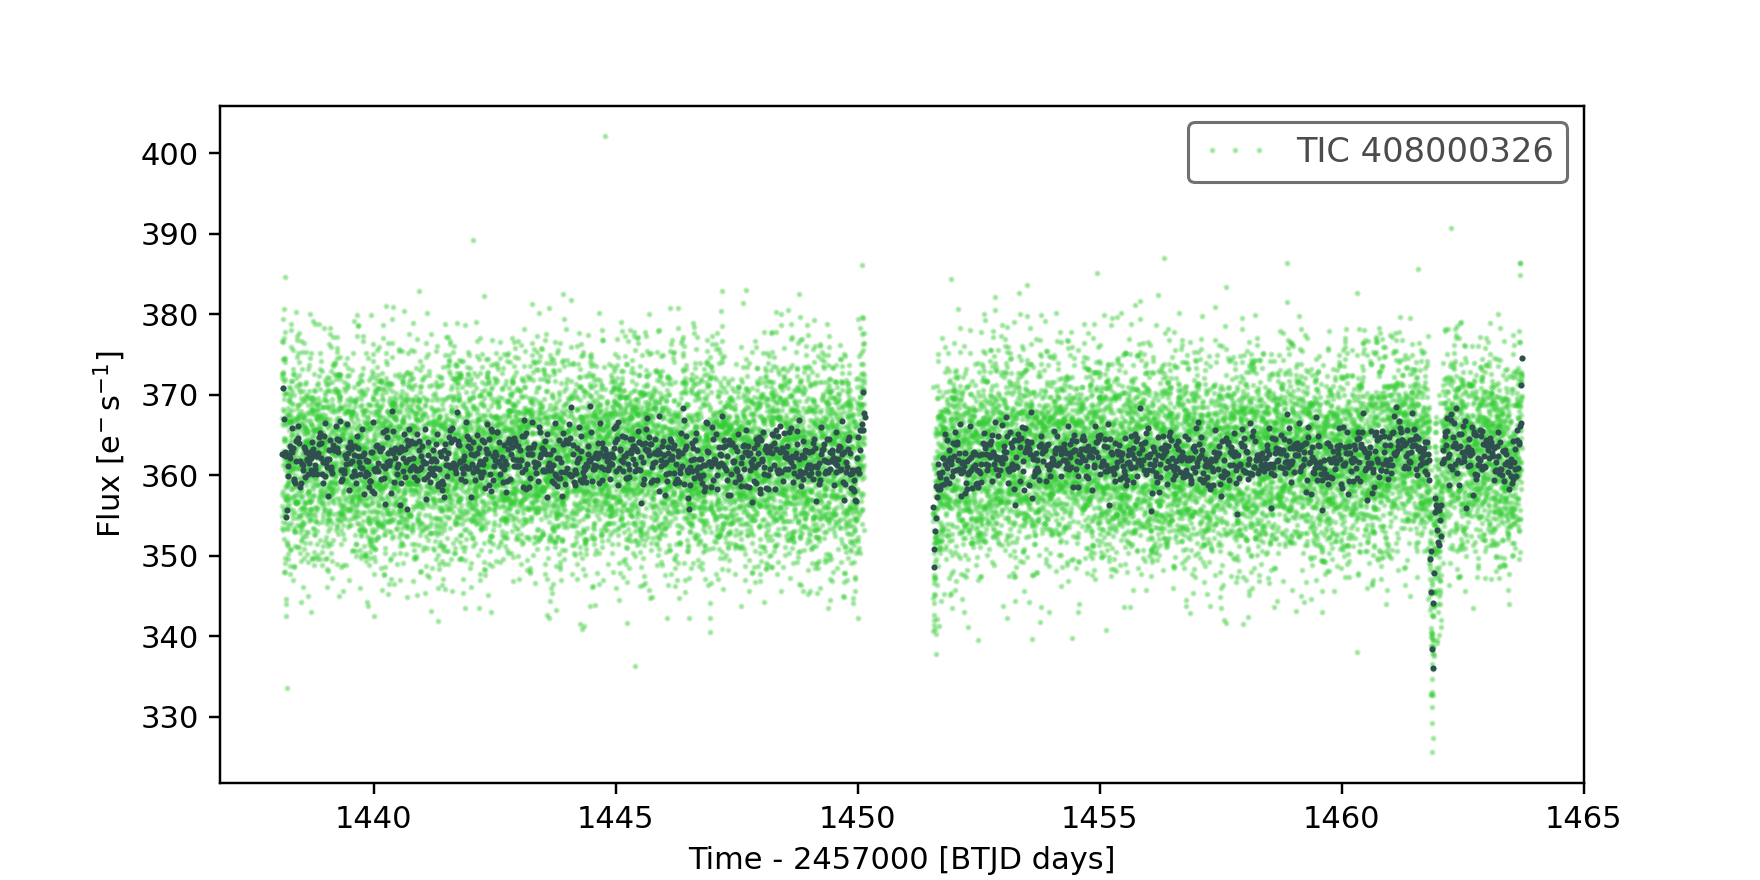

In [25]:
# example of a background event 

TIC = 'TIC 408000326' # CHANGE THIS for other targets

# download the data 
sector_data = lk.search_lightcurve(TIC, author = 'SPOC', sector = 5)
lc = sector_data.download()

fig, ax = plt.subplots(figsize = (8,4))

# plot the binned and unbinned data (see previous episodes/notebooks to find out more about how to do this)
lc.plot(ax = ax, linewidth = 0, marker = '.', color = 'limegreen', alpha = 0.3)
lc.bin(20/24/60).plot(ax = ax, linewidth = 0, marker = '.', ms = 2, color = 'darkslategrey', alpha = 1)

<IPython.core.display.Javascript object>


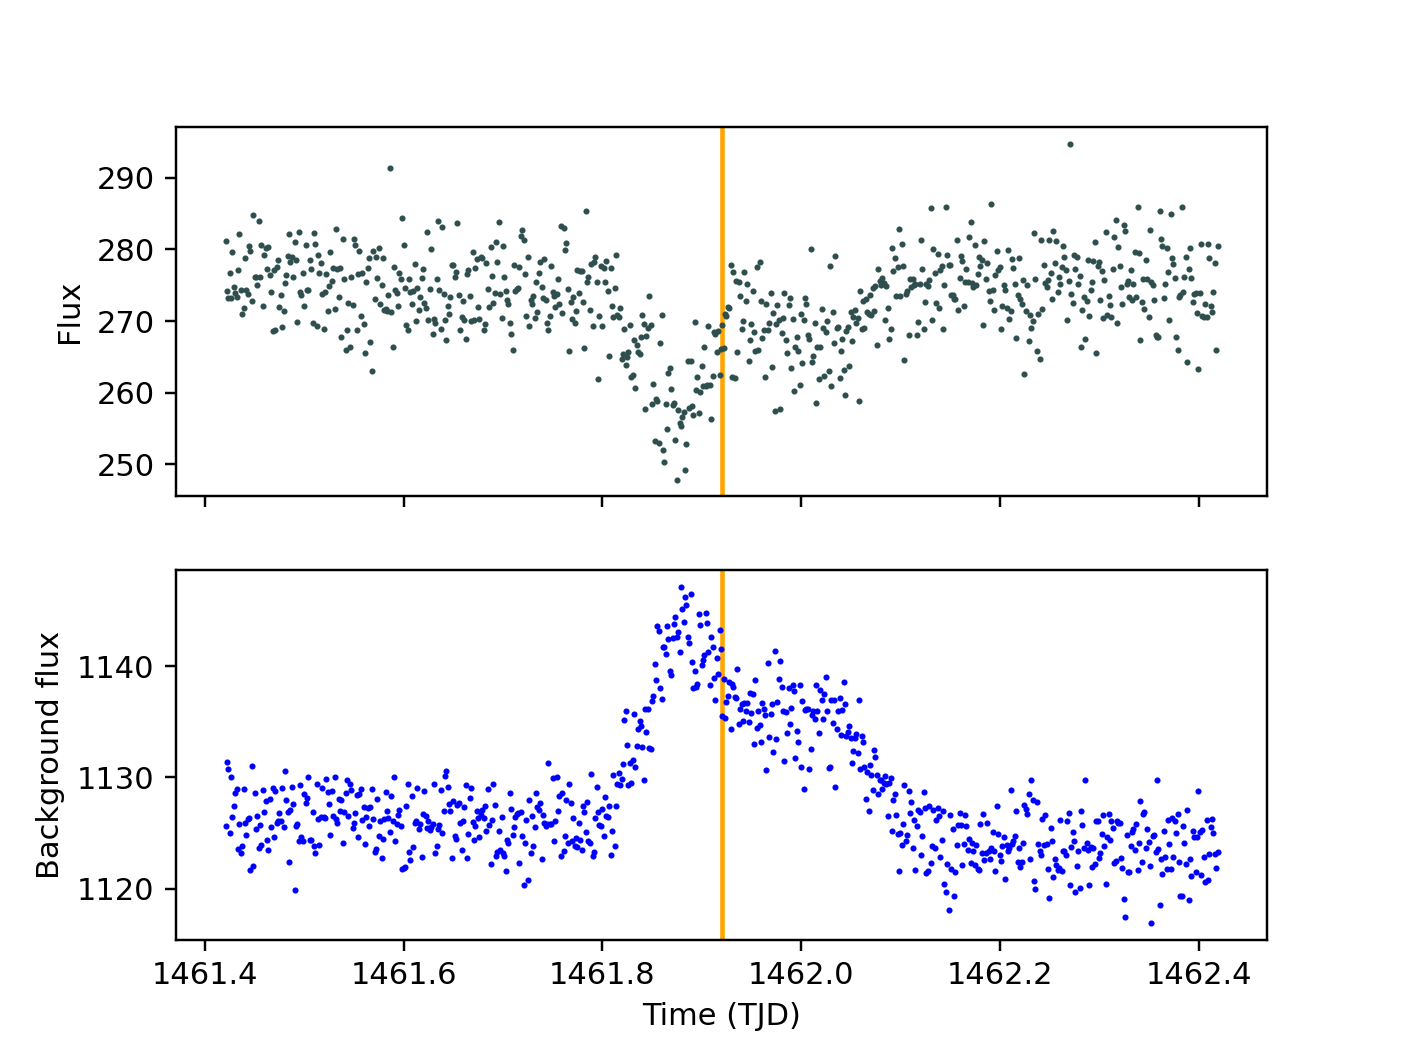

In [26]:
transit_time = 1461.92 # CHANGE THIS for other targets

# generate a mask so that we only see the times around the transit event
transit_mask = (lc.time.value > transit_time - 0.5) & (lc.time.value < transit_time + 0.5)

# make a plot with two panels so that we can see the lightcurve and the backgroudn flux next to one another
fig, ax = plt.subplots(2,1, sharex = True)

ax[0].plot(lc.time.value[transit_mask], lc.sap_flux.value[transit_mask], color = 'darkslategrey', lw = 0, marker = '.', ms = 2)
ax[1].plot(lc.time.value[transit_mask], lc.sap_bkg.value[transit_mask], color = 'blue', lw = 0, marker = '.', ms = 2)

#plot a line at the time of the transit event
ax[0].axvline(transit_time, color = 'orange', zorder = -1)
ax[1].axvline(transit_time, color = 'orange', zorder = -1)

ax[0].set_ylabel("Flux")
ax[1].set_ylabel("Background flux")
ax[1].set_xlabel("Time (TJD)")
plt.show()

<IPython.core.display.Javascript object>


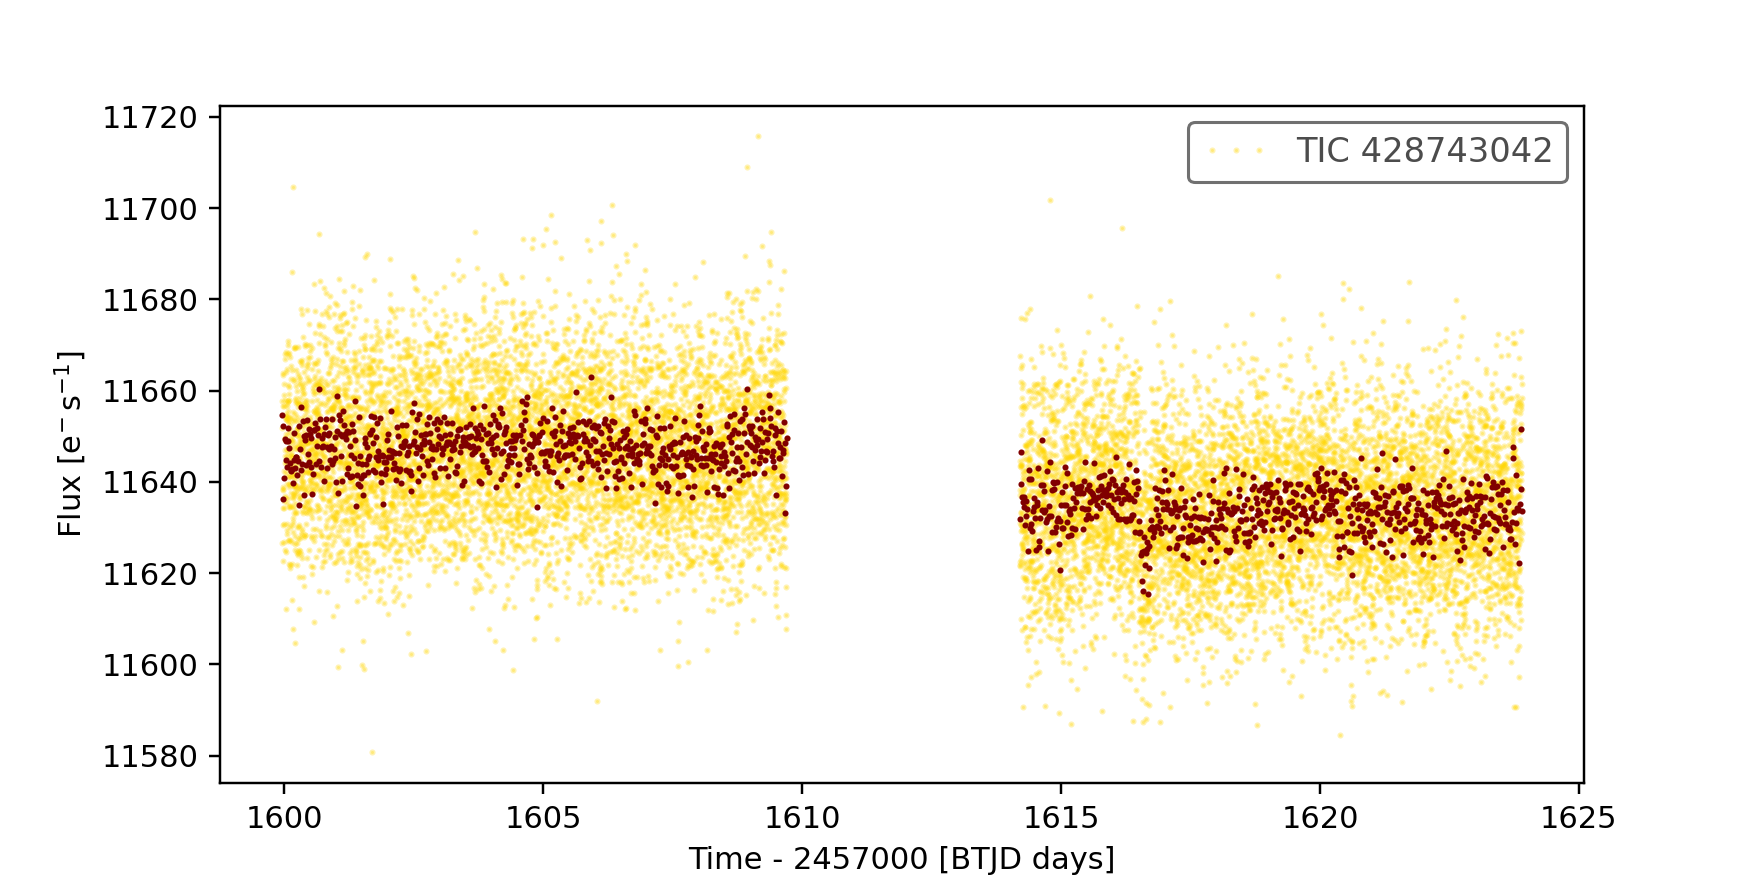

In [27]:
# example of a background event 

TIC = 'TIC 428743042' # CHANGE THIS for other targets

# search what SPOC data is available for a given target - and chose a sector (in example this is sector 5)
sector_data = lk.search_lightcurve(TIC, author = 'SPOC')
lc = sector_data.download()

fig, ax = plt.subplots(figsize = (8,4))

lc.plot(ax = ax, linewidth = 0, marker = '.', color = 'gold', alpha = 0.3)
lc.bin(20/24/60).plot(ax = ax, linewidth = 0, marker = '.', ms = 2, color = 'maroon', alpha = 1)

<IPython.core.display.Javascript object>


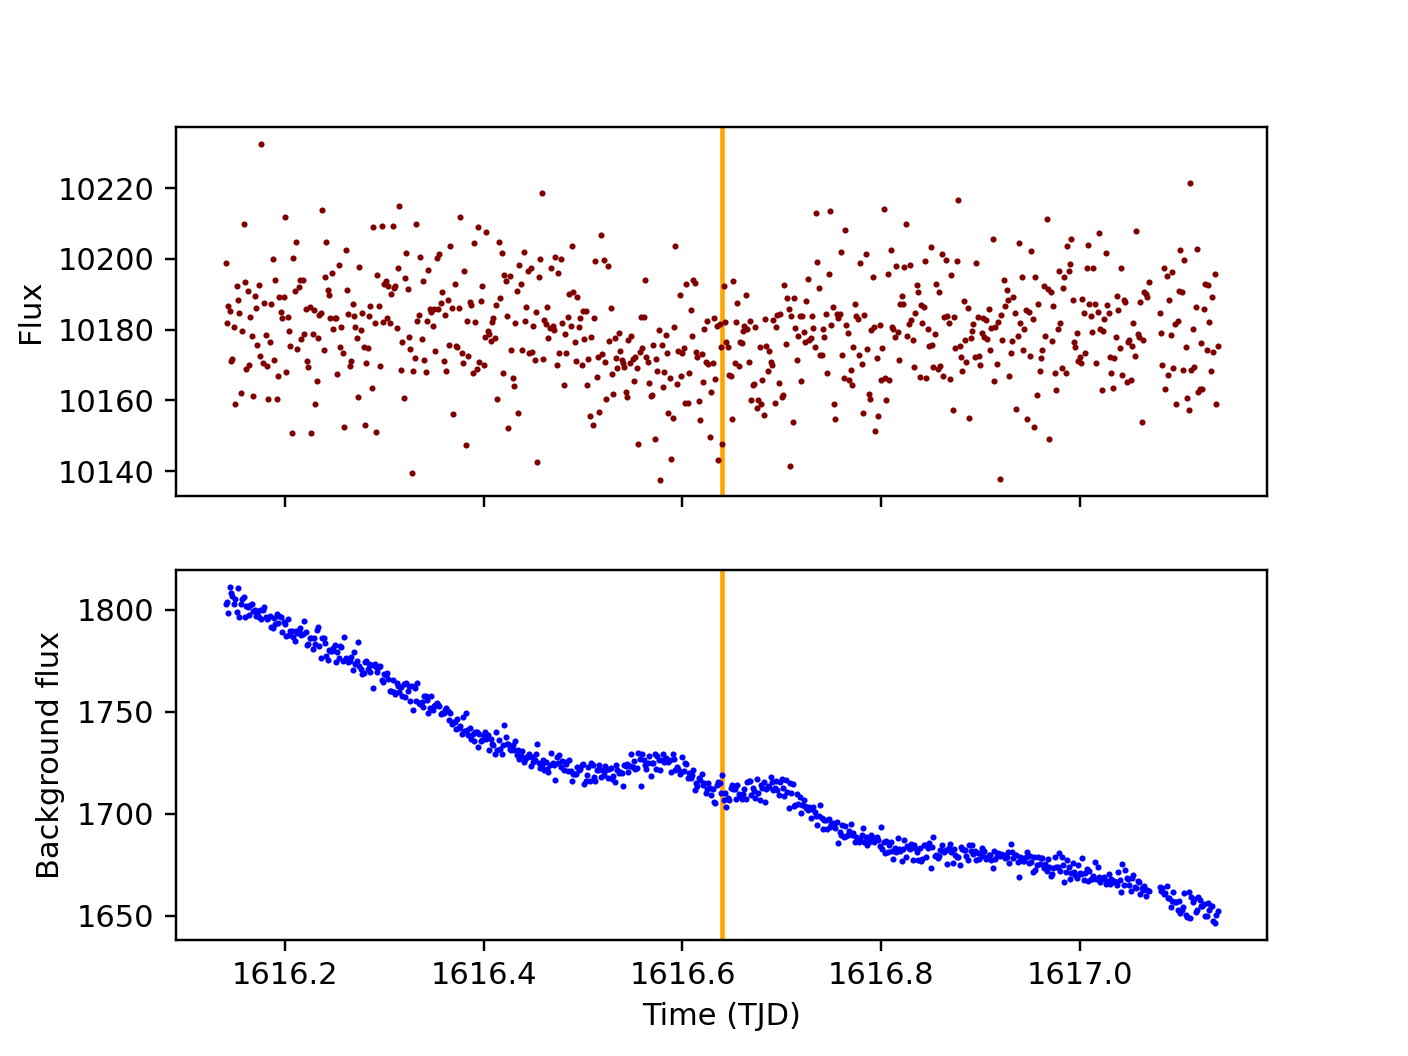

In [28]:
transit_time = 1616.64 # CHANGE THIS for other targets

# generate a mask so that we only see the times around the transit event

transit_mask = (lc.time.value > transit_time - 0.5) & (lc.time.value < transit_time + 0.5)

# make a plot with two panels so that we can see the lightcurve and the backgroudn flux next to one another
fig, ax = plt.subplots(2,1, sharex = True)

ax[0].plot(lc.time.value[transit_mask], lc.sap_flux.value[transit_mask], color = 'maroon', lw = 0, marker = '.', ms = 2)
ax[1].plot(lc.time.value[transit_mask], lc.sap_bkg.value[transit_mask], color = 'blue', lw = 0, marker = '.', ms = 2)

#plot a line at the time of the transit event
ax[0].axvline(transit_time, color = 'orange', zorder = -1)
ax[1].axvline(transit_time, color = 'orange', zorder = -1)

ax[0].set_ylabel("Flux")
ax[1].set_ylabel("Background flux")
ax[1].set_xlabel("Time (TJD)")
plt.show()

/Library/Python/anaconda/envs/astroconda/lib/python3.7/site-packages/lightkurve/search.py:352: LightkurveWarning: Warning: 2 files available to download. Only the first file has been downloaded. Please use `download_all()` or specify additional criteria (e.g. quarter, campaign, or sector) to limit your search.
  LightkurveWarning,


<IPython.core.display.Javascript object>


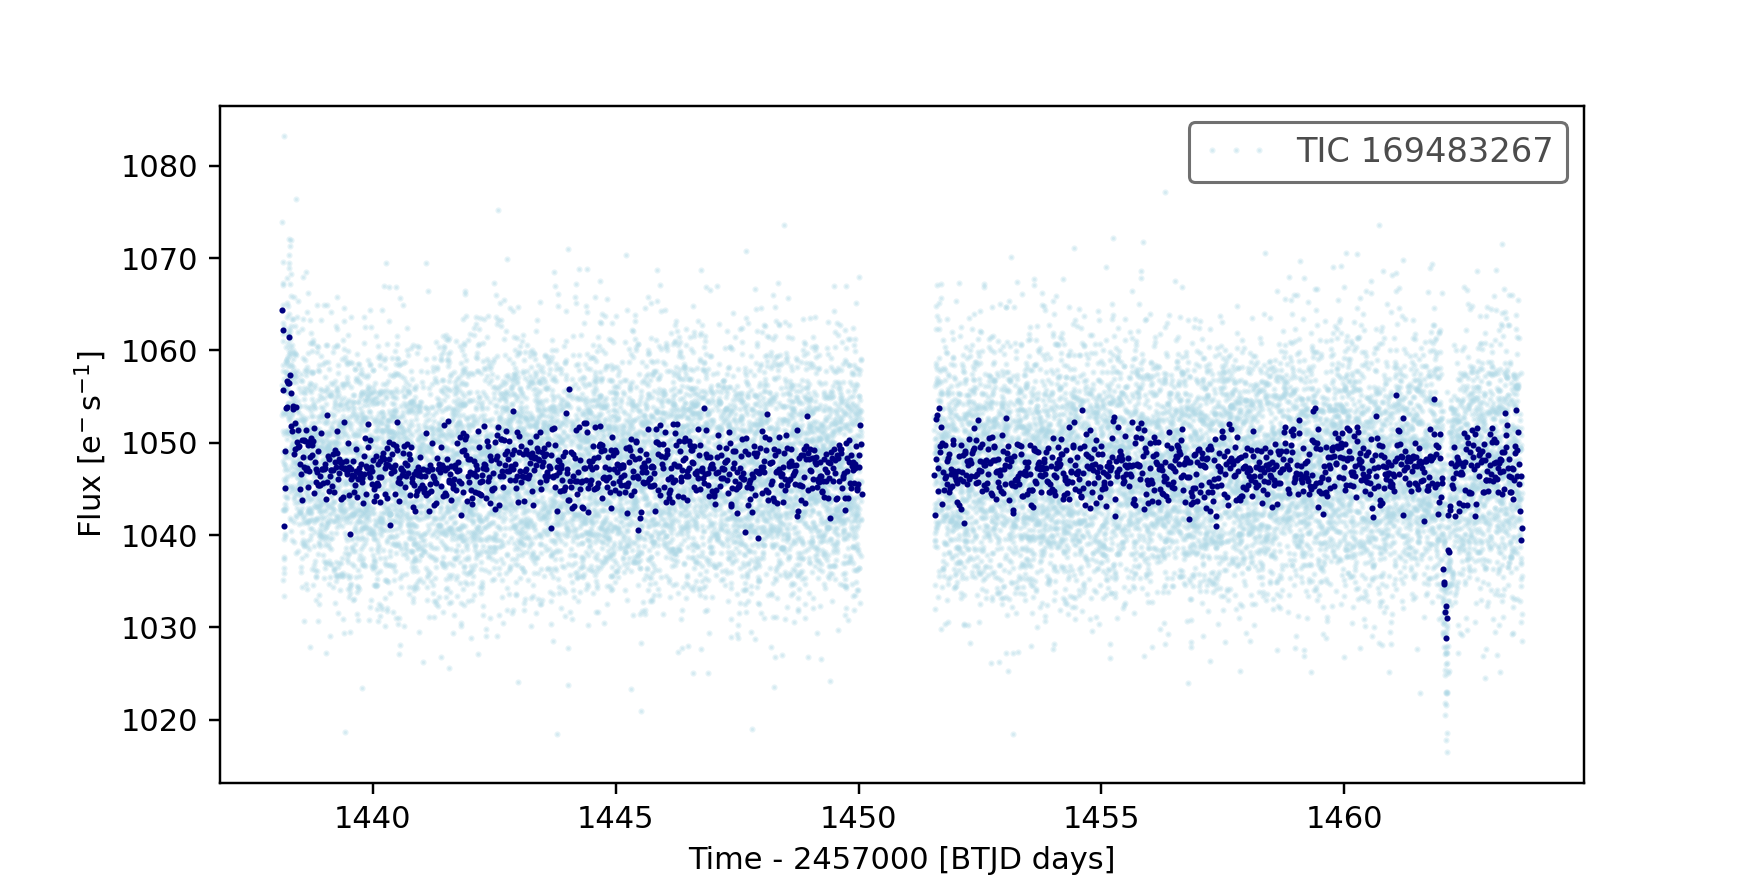

In [29]:
# example of a background event 

TIC = 'TIC 169483267'# CHANGE THIS for other targets

# search what SPOC data is available for a given target - and chose a sector (in example this is sector 5)
sector_data = lk.search_lightcurve(TIC, author = 'SPOC')
lc = sector_data.download()

fig, ax = plt.subplots(figsize = (8,4))

lc.plot(ax = ax, linewidth = 0, marker = '.', color = 'lightblue', alpha = 0.3)
lc.bin(20/24/60).plot(ax = ax, linewidth = 0, marker = '.', ms = 2, color = 'navy', alpha = 1)

<IPython.core.display.Javascript object>


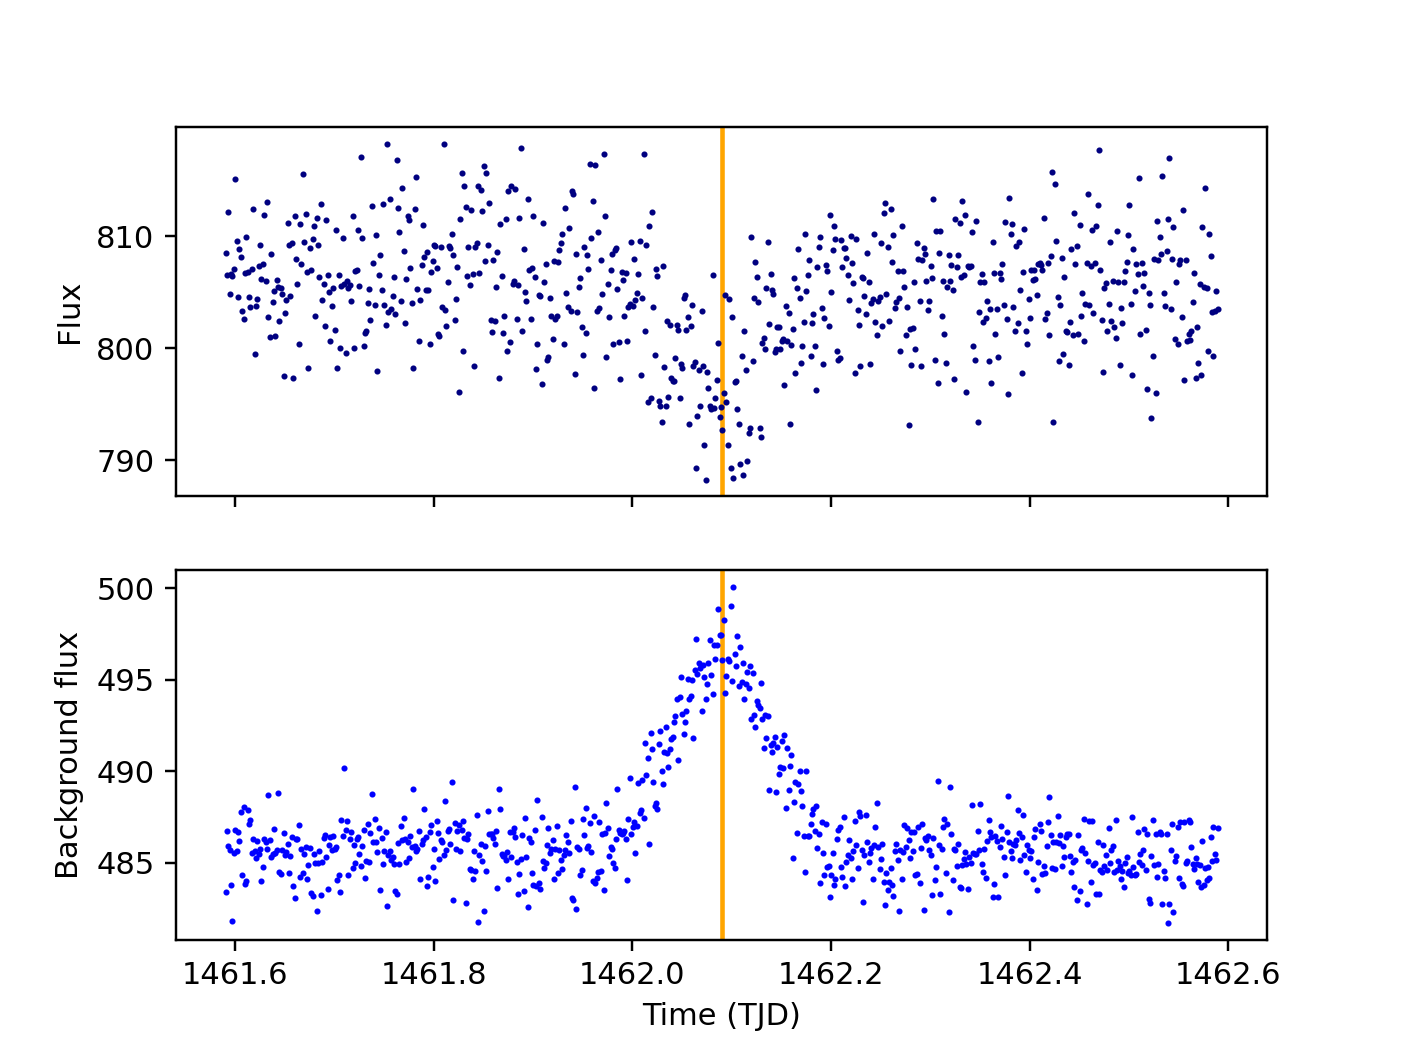

In [30]:
transit_time = 1462.09 # CHANGE THIS for other targets

# generate a mask so that we only see the times around the transit event
transit_mask = (lc.time.value > transit_time - 0.5) & (lc.time.value < transit_time + 0.5)

# make a plot with two panels so that we can see the lightcurve and the backgroudn flux next to one another
fig, ax = plt.subplots(2,1, sharex = True)

ax[0].plot(lc.time.value[transit_mask], lc.sap_flux.value[transit_mask], color = 'navy', lw = 0, marker = '.', ms = 2)
ax[1].plot(lc.time.value[transit_mask], lc.sap_bkg.value[transit_mask], color = 'blue', lw = 0, marker = '.', ms = 2)

#plot a line at the time of the transit event
ax[0].axvline(transit_time, color = 'orange', zorder = -1)
ax[1].axvline(transit_time, color = 'orange', zorder = -1)

ax[0].set_ylabel("Flux")
ax[1].set_ylabel("Background flux")
ax[1].set_xlabel("Time (TJD)")
plt.show()